Lets load in the libraries we will be using

In [41]:
from sqlalchemy import create_engine
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Read the csv file and get a description of the data. lets take a look at some of the statistical moments that occur within the data. 

In [42]:
df = pd.read_csv(r"C:\Users\levos\OneDrive\Python\Tagup\machine_0.csv")
#print(df.shape)
#print(df.info())

print(df.describe())

                 0            1            2            3
count  3000.000000  3000.000000  3000.000000  3000.000000
mean     -0.816016    -1.091308     1.267945     0.165844
std      58.078319    55.965665    56.538700    56.910659
min    -323.954437  -258.780879  -287.153920  -365.362164
25%      -0.008684    -0.008851    -0.008274    -0.007883
50%      -0.000402    -0.000085     0.000669     0.000310
75%       0.007832     0.008373     0.009056     0.008685
max     315.738951   264.374782   281.684102   340.513819


Interestingly enough, we find that though the mean and 75% range falls ~0, there is are maximums and a minimums across all columns that are +-300. These seem out of place.

Lets use a scatterplot and histogram to get an understanding of the data and double check potential outliers.

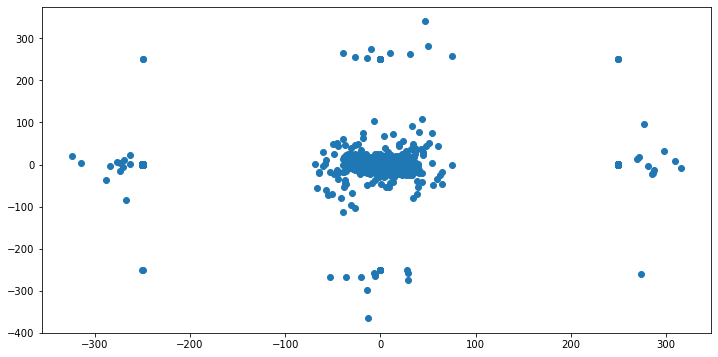

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['0'], df['3'])
plt.show()

Text(0.5, 1.0, '3')

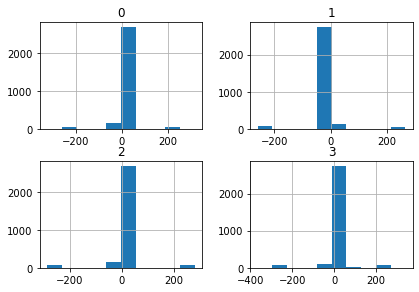

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
plt.subplot(2,2,1)
df['0'].hist()
plt.title('0')
plt.subplot(2,2,2)
df['1'].hist()
plt.title('1')
plt.subplot(2,2,3)
df['2'].hist()
plt.title('2')
plt.subplot(2,2,4)
df['3'].hist()
plt.title('3')

Lets identify the outliers with interquartile range(IQR). This is a simple test that finds values that do not fall in between 25th and 75th percentile.


In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0    0.016515
1    0.017223
2    0.017331
3    0.016567
dtype: float64


After having looked at this range and also referred to the visualizations, I am confident that the data outside this range are outliers.
Next, Lets treat the outliers using an IQR range and what we found above. anything outside of the Q1-Q3 range will be removed. (This is a general rule of thumb and since the tails are such extreme outliers, they are easy to spot and filter) 

In [36]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis = 1)]

Lets take a look at the new shape of this data. We can see that after we filtered out outliers, we are left with roughly 900 less rows than we started.

In [33]:
print(df.shape)

(2132, 5)


Now, lets see this data in a scatterplot to see what it looks like without outliers (The given relationship between column names 0-3 all yield the same results via scatterplot. I chose to use 1 and 3 but this was just an example)

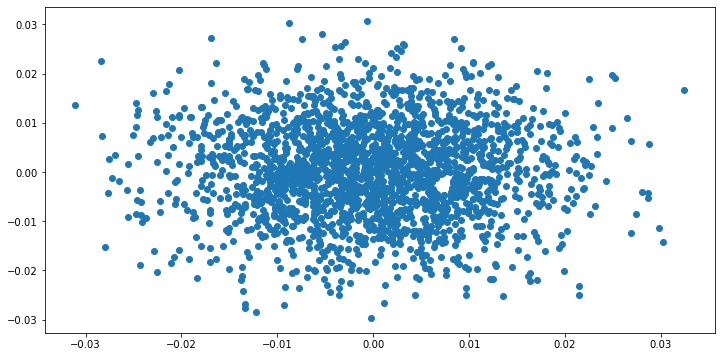

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['1'], df['3'])
plt.show()

As we can see, the outliers have been removed. Lets check out the new statistical moments.

In [24]:
print(df.describe())

                 0            1            2            3
count  2132.000000  2132.000000  2132.000000  2132.000000
mean     -0.000169    -0.000335     0.000290     0.000240
std       0.009795     0.010015     0.009946     0.009653
min      -0.031246    -0.031066    -0.033386    -0.029675
25%      -0.006814    -0.007152    -0.006475    -0.006183
50%      -0.000241    -0.000241     0.000510     0.000238
75%       0.006125     0.006610     0.006951     0.006936
max       0.029626     0.032430     0.033101     0.030584


Lets map this data into an in-memory SQLite database for simplicity

In [39]:
engine = create_engine('sqlite://', echo=False)
df.to_sql('machine', con = engine)
engine.execute("SELECT * FROM machine LIMIT 10").fetchall()

[(397, '2019-05-13 09:03:32.470823608', 0.0039460220901702, 0.0091802659852136, 0.0048829984657153, 0.0100350785801525),
 (400, '2019-05-14 09:04:01.280426810', -0.0066527063651501, -0.0030631511639578, -0.0043790200842087, 0.0022761625827735),
 (401, '2019-05-14 17:04:10.883627876', -0.0011256091087574, 0.0122489103313204, -0.001379886122787, 0.0067996980588971),
 (402, '2019-05-15 01:04:20.486828944', -0.0025412189308516, 0.0183867085534296, -0.0116037135717102, -0.0044641404657059),
 (404, '2019-05-15 17:04:39.693231078', 0.0179779944789983, 0.0019509496922229, -0.0013564043042271, -0.0088443357080387),
 (407, '2019-05-16 17:05:08.502834278', 0.0075539036494586, -0.010361359296856, 0.0042278533416301, 0.0060094252309562),
 (409, '2019-05-17 09:05:27.709236412', -0.0197646829402048, -0.0024153329613848, -0.0076552795568156, 0.0067388455698819),
 (410, '2019-05-17 17:05:37.312437480', -0.0158954686399675, -0.0061611395344072, 2.1699680292157107e-05, -0.008796170651247),
 (411, '2019-0